In [1]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from Elo_rating import Elo_rating
from dynamic_model import dynamic_model
import time
import math

In [2]:
#df = pd.read_excel('C:/Users/ug033207/ispanya.xlsx', sheet_name= 'match results')
#result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Germany20 first half')
#result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Germany20 second half')
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
#result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'LEC first half')
#result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'LEC second half')
solution_df = pd.read_excel('C:/Users/ug033207/match_resultlar2.xlsx', sheet_name= 'Spain first half')
solution_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar2.xlsx', sheet_name= 'Spain second half')
n=20

teams = list(range(1,n+1))
days = list(range(1,n))
all_days = list(range(1,2*n-1))
days2 = list(range(n,2*n-1))

#initial_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#initial_ratings = {i: 0 for i in range(1, 19)}
#initial_ratings = {1:86, 2:73, 3:71, 4:59, 5:70, 6:65, 7:62, 8:55, 9:46, 10:48, 11:39, 12:47, 13:39, 14:42, 15:38, 16:42, 17:35, 18:42, 19:39, 20:31}

#initial_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}
initial_ratings = {i: 0 for i in range(1, n+1)}
U_ij = np.zeros((n, n)) 
ratings_array = np.array(list(initial_ratings.values()))
for i in range(n):
    for j in range(n):
        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))
ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

objective_values = []
objective_values2 = []


ratings = initial_ratings

for d in days:

    obj_count = 0
    for _, row in result_df.iterrows():
        team1 = row['Team 1']
        team2 = row['Team 2']
        day = row['Day']
        if d == day:
            obj_count += ratings_df.iloc[team1-1, team2-1]

    d= [d]
    ratings, ratings_df = point_rating(ratings, teams, result_df, result_df, d)
    print(ratings)
    print(obj_count)
    objective_values.append(obj_count)

for d in days2:

    obj_count = 0
    for _, row in result_df2.iterrows():
        team1 = row['Team 1']
        team2 = row['Team 2']
        day = row['Day']
        if d == day:
            obj_count += ratings_df.iloc[team1-1, team2-1]

    d= [d]
    ratings, ratings_df = point_rating(ratings, teams, result_df2, result_df2, d)
    print(ratings)
    print(obj_count)
    objective_values2.append(obj_count)


  Team 1 Team 2 Result
0      4      1      4
1      6     12      6
2      7      3    tie
3      8      5    tie
4     10      2      2
5     15     11     16
6     16      9      9
7     18     17     17
8     19     13     13
9     20     14    tie
{1: 0, 2: 3, 3: 1, 4: 3, 5: 1, 6: 3, 7: 1, 8: 1, 9: 3, 10: 0, 11: 1, 12: 0, 13: 3, 14: 1, 15: 1, 16: 0, 17: 3, 18: 0, 19: 0, 20: 1}
0.0
  Team 1 Team 2 Result
0      1      6      1
1      5      2      2
2      8      7      7
3      9     15     15
4     10      3      3
5     12      4      4
6     13     14    tie
7     17     20     17
8     18     16     18
9     19     11     11
{1: 3, 2: 6, 3: 4, 4: 6, 5: 1, 6: 3, 7: 4, 8: 1, 9: 3, 10: 0, 11: 4, 12: 0, 13: 4, 14: 2, 15: 4, 16: 0, 17: 6, 18: 3, 19: 0, 20: 1}
16.0
  Team 1 Team 2 Result
0      3      1      1
1      4      7      7
2      6      8    tie
3     10      5    tie
4     11     17     17
5     12      2      2
6     13      9      9
7     14     16    tie
8     15     1

In [3]:
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
#result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'LEC first half')
#result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'LEC second half')
solution_df = pd.read_excel('C:/Users/ug033207/match_resultlar2.xlsx', sheet_name= 'Spain first half')
solution_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar2.xlsx', sheet_name= 'Spain second half')
n=20

teams = list(range(1,n+1))
days = list(range(1,n))
p=18
ratings = {i: 0 for i in range(1, n+1)}
U_ij = np.zeros((n, n)) 
ratings_array = np.array(list(ratings.values()))
for i in range(n):
    for j in range(n):
        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))
ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)
k = math.ceil((n - 1) / p)
rounds = [days[i*p:((i+1)*p)] for i in range(k)]
rounds = list(filter(None, rounds))
print(rounds)



[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [19]]


[0.0, 16.0, 23.0, 27.0, 37.0, 32.0, 49.0, 62.0, 52.0, 53.0, 61.0, 65.0, 103.0, 83.0, 87.0, 92.0, 80.0, 97.0, 129.0]
[  0.  16.  23.  27.  37.  32.  49.  62.  52.  53.  61.  65. 103.  83.
  87.  92.  80.  97. 129. 117.  92. 153. 126. 129. 129. 162.  98. 107.
 154. 120. 120. 114. 105. 185. 172. 205. 220. 268.]
3924.0


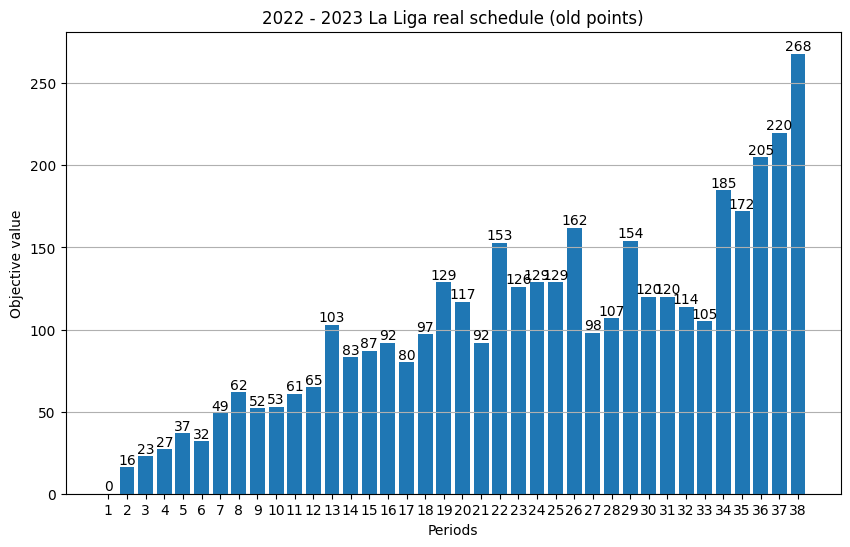

In [4]:
print(objective_values)
obje =  objective_values + objective_values2

obje = np.array(obje)
print(obje)
print(sum(obje))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(obje)), obje)
plt.bar_label(bars)
plt.xlabel('Periods')
plt.ylabel('Objective value')
plt.title('2022 - 2023 La Liga real schedule (old points)')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1,39)]  # New tick labels
plt.xticks(range(len(obje)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,100)
plt.show()